# Pymaceuticals Inc.
---

### Analysis

- According to the results of the data, there were at least 13 line samples that needed to be removed due to duplication, with the main duplicate mouse being g989. Once the data was clean, based on the results of the drug distributed, two drugs stood out as the best results, Capomulin and Ramicane. Both drugs held near similar results across all categories with no outliers. The largest tumor results were produced by Ketapril, which is the only drug with a tumor average higher than 55 and a standard error of over 60%. Lastly, and the guards to the correlation between mouse weight and tumor volume, it would seem as though the higher the mouse’s weight the higher the tumor volume is, with a correlation of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(
    mouse_metadata, study_results,
    on=['Mouse ID'])

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice_count = len(
    mouse_study_results["Mouse ID"].unique())
print(mice_count)

mouse_study_results.shape

249


(1893, 8)

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

possible_duplicates = mouse_study_results.loc[
     mouse_study_results.duplicated(
         subset=["Mouse ID", "Timepoint"],
         keep=False)]

possible_duplicates["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
possible_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_study_results = mouse_study_results.loc[
    mouse_study_results["Mouse ID"] != 'g989']
    

new_mouse_study_results.sort_values(by="Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
459,a203,Infubinol,Female,20,23,25,56.793208,1
462,a203,Infubinol,Female,20,23,40,63.593490,2
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = new_mouse_study_results.loc[:,"Mouse ID"].nunique()

print(new_mice_count)
new_mouse_study_results.shape


248


(1880, 8)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = new_mouse_study_results.groupby(
    "Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = new_mouse_study_results.groupby(
    "Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = new_mouse_study_results.groupby(
    "Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_standard_dev = new_mouse_study_results.groupby(
    "Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = new_mouse_study_results.groupby(
    "Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_stats_pd = pd.DataFrame(
    {
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_standard_dev,
    "Tumor Volume Std. Err.": tumor_sem
})
drug_stats_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_stats_agg = new_mouse_study_results.groupby(
    by=["Drug Regimen"],
    )

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_agg["Tumor Volume (mm3)"].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
    ])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

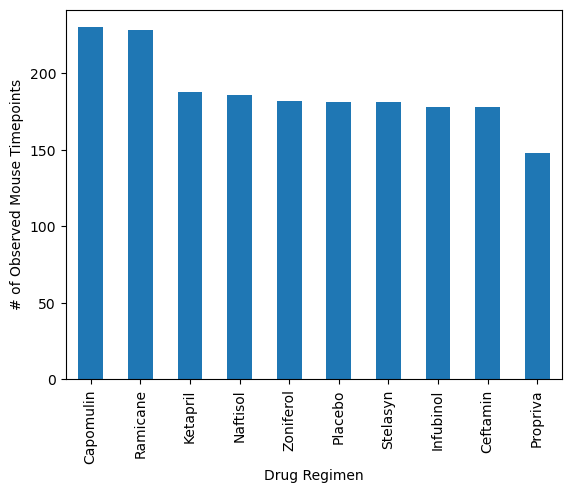

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_names = new_mouse_study_results[
    'Drug Regimen'].unique()

timepoints_per_regimen = new_mouse_study_results[
    'Drug Regimen'].value_counts()

timepoints_per_drug_pd = timepoints_per_regimen.plot(
    kind="bar",
    )

timepoints_per_drug_pd.set_ylabel(
    "# of Observed Mouse Timepoints"
    )

timepoints_per_drug_pd.set_xlabel(
    "Drug Regimen"
    )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

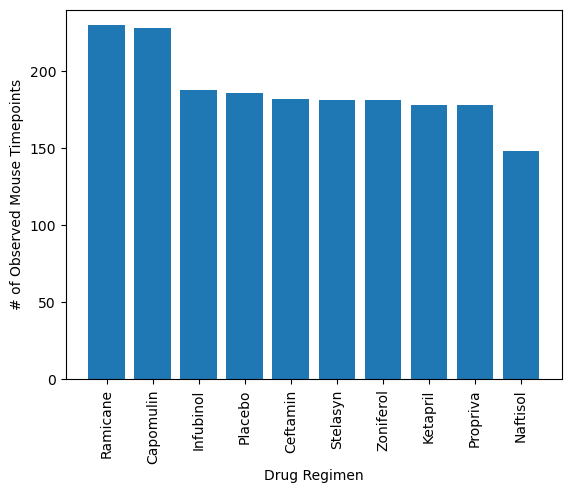

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_names, timepoints_per_regimen)
plt.ylim(0,max(timepoints_per_regimen)+10)
plt.xticks(drug_names, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

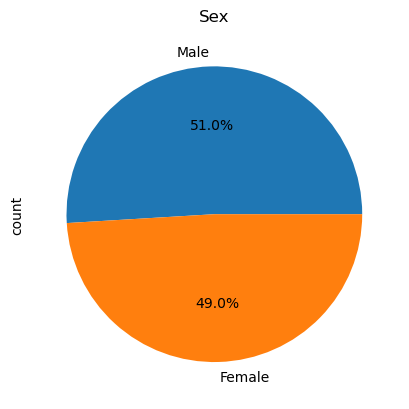

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = new_mouse_study_results['Sex'].value_counts()
sex = new_mouse_study_results['Sex'].unique()

male_vs_female.plot(
    kind='pie',
    title='Sex',
    labels=sex,
    autopct="%1.1f%%"
)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

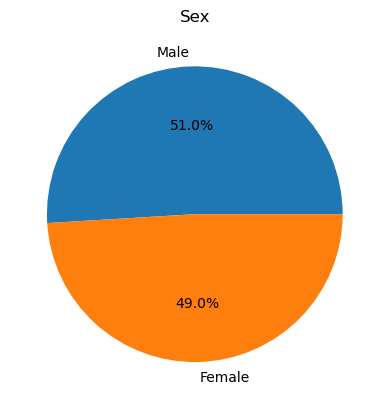

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female = new_mouse_study_results['Sex'].value_counts()
sex = new_mouse_study_results['Sex'].unique()

plt.pie(
    male_vs_female,
    labels=sex,
    autopct= "%1.1f%%")
plt.title("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_max_timepoints = new_mouse_study_results.groupby('Mouse ID')['Timepoint'].max().sort_values()
mouse_max_timepoints_df = pd.DataFrame(mouse_max_timepoints)

mouse_max_timepoints_df = mouse_max_timepoints_df.rename(
    columns={"Timepoint": "Max Timepoint"})
# Start by getting the last (greatest) timepoint for each mouse
final_mouse_study_results = pd.merge(
    new_mouse_study_results,
    mouse_max_timepoints_df,
    on= 'Mouse ID',
    how= 'left')
final_mouse_study_results.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0,45
96,u364,Capomulin,Male,18,17,5,45.760886,1,45
97,u364,Capomulin,Male,18,17,10,46.568417,2,45
98,u364,Capomulin,Male,18,17,15,47.212200,2,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    temp = final_mouse_study_results.loc[
        final_mouse_study_results['Drug Regimen']== drug]
    
    final_point = temp.loc[
        temp['Timepoint']==temp['Max Timepoint']]
    
    values = final_point['Tumor Volume (mm3)']
    drug_series = drug_values.append(values)

    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = (values.loc[
        (final_point['Tumor Volume (mm3)'] >= upper_bound) |
        (final_point['Tumor Volume (mm3)'] <= lower_bound)])

    print(f'{drug} Potential Outliers: {outliers}')
   

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


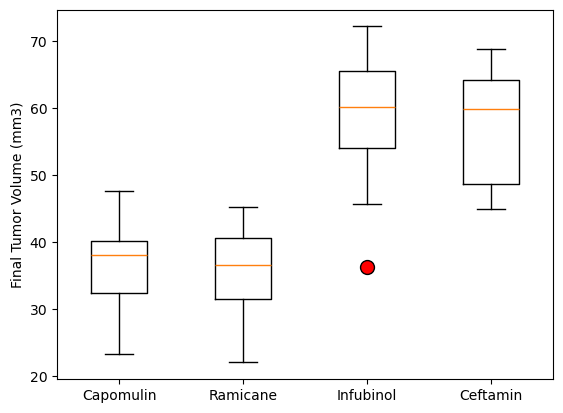

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(
    marker = "o",
    markerfacecolor = "r",
    markersize = 10,
    markeredgecolor = "black")

plt.boxplot(
    drug_values,
    flierprops= flierprops
    )
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(
    [1, 2, 3, 4],
    ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

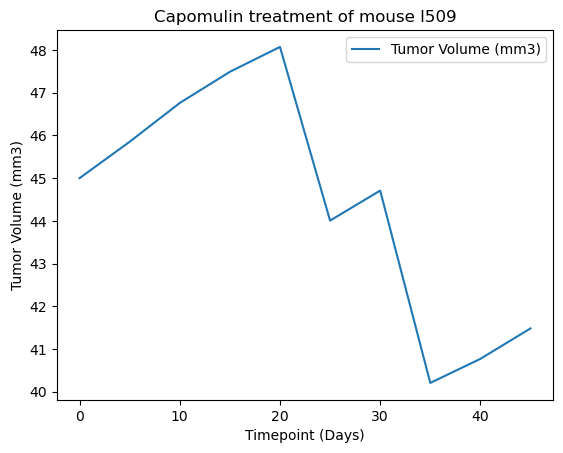

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
special_friend = final_mouse_study_results.loc[
    final_mouse_study_results['Mouse ID']=='l509']

friend_tumor_timeline = pd.DataFrame(
    special_friend,
    columns=['Timepoint','Tumor Volume (mm3)'])

friend_tumor_timeline = friend_tumor_timeline.set_index('Timepoint')

plot_friend = friend_tumor_timeline.plot(
    kind='line',
    ylabel='Tumor Volume (mm3)',
    xlabel='Timepoint (Days)',
    title='Capomulin treatment of mouse l509',
    
    )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

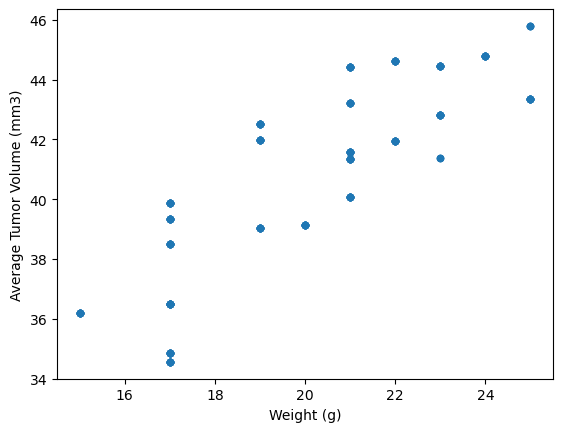

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_buddies = final_mouse_study_results.loc[
    final_mouse_study_results['Drug Regimen']=='Capomulin']
gains_chart = pd.DataFrame(
    cap_buddies,
    columns=['Mouse ID','Weight (g)','Tumor Volume (mm3)'])

cap_tumor_average = gains_chart.groupby(
    'Mouse ID')['Tumor Volume (mm3)'].mean()
cap_tumor_average_df = pd.DataFrame(cap_tumor_average)
cap_tumor_average_df = cap_tumor_average_df.rename(
    columns={'Tumor Volume (mm3)':'Tumor Average'})

cap_gains_chart = pd.merge(
    gains_chart,
    cap_tumor_average_df,
    on= 'Mouse ID',
    how= 'left')
cap_gains_chart = cap_gains_chart.drop(columns='Tumor Volume (mm3)')

plot_cap_chart = cap_gains_chart.plot(
    kind='scatter',
    x= 'Weight (g)',
    y= 'Tumor Average',
    xlabel='Weight (g)',
    ylabel='Average Tumor Volume (mm3)')

plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is               Weight (g)  Tumor Average
Weight (g)       1.000000       0.834396
Tumor Average    0.834396       1.000000


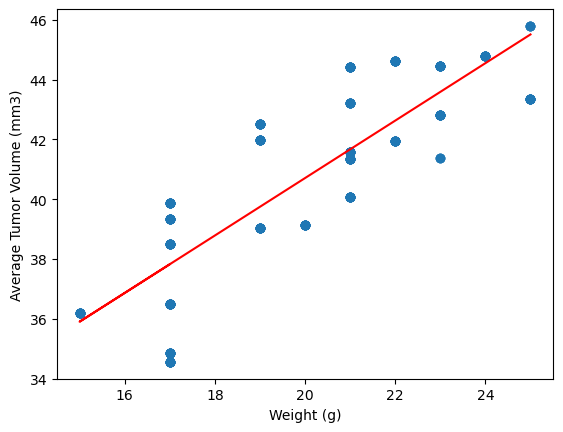

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = cap_gains_chart['Weight (g)']
y_values = cap_gains_chart['Tumor Average']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

cor = cap_gains_chart.corr(numeric_only=True)

print(f'The correlation between mouse weight and the average tumor volume is{cor}')